#### Learn Pandas

Data structures (objects):
- **Series**: 1D array
- **DataFrame**: 2D table
- **Panel**: a dictionary of DataFrames

In [2]:
import pandas as pd

# Series
## Creating a Series with `Series`

In [3]:
s = pd.Series([1,2,3])
s

0    1
1    2
2    3
dtype: int64

Works with numpy arrays:

In [4]:
import numpy as np
s = pd.Series(np.linspace(3,5,4))
s

0    3.000000
1    3.666667
2    4.333333
3    5.000000
dtype: float64

## Index Labels

In [5]:
age = pd.Series([26, 27, 53], index=["athena", "lin", "charles"])
age

athena     26
lin        27
charles    53
dtype: int64

In [6]:
age["athena"]
age.loc["athena"] # same result as previous, but more recommended

26

In [7]:
age[0]
age.iloc[0] # same result as previous, but more recommended

26

## Array Slicing
Better practice to use `iloc`.

In [8]:
sliced = age.iloc[1:]
sliced

lin        27
charles    53
dtype: int64

In [9]:
sliced.iloc[0]

27

## Init from `dict`

In [10]:
weights_dict = {"athena": 68, "bob": 83, "lin": 86, "darwin": 68}
weights = pd.Series(weights_dict)
weights

athena    68
bob       83
lin       86
darwin    68
dtype: int64

In [11]:
s_weight = pd.Series(weights, index = ["lin", "athena"])
s_weight

lin       86
athena    68
dtype: int64

## Automatic Alignment

When operating on Series objects, pandas aligns items by matching index labels.

In [12]:
age + weights

athena      94.0
bob          NaN
charles      NaN
darwin       NaN
lin        113.0
dtype: float64

## Init with a Scalar (a Number)

In [13]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## Series can have a `name` attribute

In [14]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Plotting a Series with `plot()`

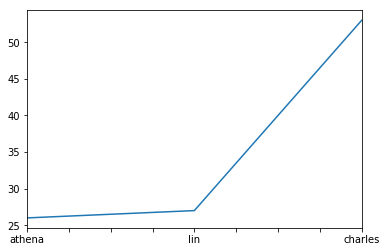

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
age.plot()
plt.show()

# Handling Time
pass

# `DataFrame` Objects

## Creating a DataFrame from Series

In [16]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [17]:
people["weight"]

alice       68
bob         83
charles    112
Name: weight, dtype: int64

In [18]:
people[["weight","birthyear"]]

,weight,birthyear
alice,68,1985
bob,83,1984
charles,112,1992


Create DataFrame with ndarray, column names, row index labels:

In [19]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


- Or create with another DataFrame object
- Or create with a dictionary/list of dictionares/lists

# Multi-indexing

In [20]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
London charles      1992      NaN     112      0.0
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0

In [21]:
d5["public"]

birthyear    hobby
London charles       1992      NaN
Paris  alice         1985   Biking
       bob           1984  Dancing

In [22]:
d5["public","hobby"]

London  charles        NaN
Paris   alice       Biking
        bob        Dancing
Name: (public, hobby), dtype: object

## Drop Level

In [23]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
London charles       1992      NaN     112       0.0
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0

## Transpose with `.T`

## Stack and unstack with `.stack()` and `.unstack()`
(returns a copy of the original DF)

## Accessing rows with `loc[]` and `iloc[]`

In [24]:
people.loc["bob"]

weight            83
birthyear       1984
children           3
hobby        Dancing
Name: bob, dtype: object

In [25]:
people[people["weight"] > 80]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


## Adding and Deleting Columns

In [26]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,weight,hobby,age,over 30
alice,68,Biking,33,True
bob,83,Dancing,34,True
charles,112,NaN,26,False


In [27]:
people.insert(1, "height", [172, 181, 185])
people

,weight,height,hobby,age,over 30
alice,68,172,Biking,33,True
bob,83,181,Dancing,34,True
charles,112,185,NaN,26,False


## Assigning New Columns with `assign()`
returns new DF

In [28]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
)

,weight,height,hobby,age,over 30,body_mass_index
alice,68,172,Biking,33,True,22.985398
bob,83,181,Dancing,34,True,25.335002
charles,112,185,NaN,26,False,32.724617


In [29]:
# Chain assign with lambda function
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,weight,height,hobby,age,over 30,body_mass_index,overweight
alice,68,172,Biking,33,True,22.985398,False
bob,83,181,Dancing,34,True,25.335002,True
charles,112,185,NaN,26,False,32.724617,True


## Evaluating an expression with `eval("expression")`

In [30]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

In [31]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,weight,height,hobby,age,over 30,body_mass_index
alice,68,172,Biking,33,True,22.985398
bob,83,181,Dancing,34,True,25.335002
charles,112,185,NaN,26,False,32.724617


In [32]:
# Use local/global variable by prefixing it with @
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,weight,height,hobby,age,over 30,body_mass_index,overweight
alice,68,172,Biking,33,True,22.985398,False
bob,83,181,Dancing,34,True,25.335002,False
charles,112,185,NaN,26,False,32.724617,True


## Querying with `query("condition")`

In [33]:
people.query("age > 30 and height < 180")

,weight,height,hobby,age,over 30,body_mass_index,overweight
alice,68,172,Biking,33,True,22.985398,False


## Sorting indexes with `sort_index()`

- By default, returns a new copy, unless set `inplace=True`
- By default, sort along the row. To sort columns, set `axis=1`
- By default, sort in ascending order, unless set `ascending=False`

In [34]:
people.sort_index(axis=1)

,age,body_mass_index,height,hobby,over 30,overweight,weight
alice,33,22.985398,172,Biking,True,False,68
bob,34,25.335002,181,Dancing,True,False,83
charles,26,32.724617,185,NaN,False,True,112


## Sort by Values with `sort_values(by="label")`

In [35]:
people.sort_values(by="age")

,weight,height,hobby,age,over 30,body_mass_index,overweight
charles,112,185,NaN,26,False,32.724617,True
alice,68,172,Biking,33,True,22.985398,False
bob,83,181,Dancing,34,True,25.335002,False


## Operations on DataFrames
Works like numpy arrays. Functions like `np.sqrt(df)` and operations like `+`, `**`, `>` also work.

Aggregationg operations like `max`, `sum`, `mean` apply to column, and return a Series Object.

In [36]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [44]:
print(grades.mean())
grades.values.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64


8.0

In [42]:
(grades>5).all(axis=1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

In [43]:
(grades==8).any(axis=1)

alice       True
bob        False
charles     True
darwin     False
dtype: bool

## Handling Missing Data
With `fillna(value_to_fill_NAN)` method

In [46]:
people.fillna('unknown')

,weight,height,hobby,age,over 30,body_mass_index,overweight
alice,68,172,Biking,33,True,22.985398,False
bob,83,181,Dancing,34,True,25.335002,False
charles,112,185,unknown,26,False,32.724617,True


In [56]:
people.loc["bob","weight"] = np.NaN
people

,weight,height,hobby,age,over 30,body_mass_index,overweight
alice,68.0,172,Biking,33,True,22.985398,False
bob,NaN,181,Dancing,34,True,25.335002,False
charles,112.0,185,NaN,26,False,32.724617,True


Or use `interpolate()` to fill missing value with interpolated data. Default on (axis=0) - vertically.

In [59]:
people.interpolate()

,weight,height,hobby,age,over 30,body_mass_index,overweight
alice,68.0,172,Biking,33,True,22.985398,False
bob,90.0,181,Dancing,34,True,25.335002,False
charles,112.0,185,NaN,26,False,32.724617,True


Drop the columns(axis=1) which have missing data with `dropna()`:

In [65]:
people.dropna(axis=1, how="all")

,weight,height,hobby,age,over 30,body_mass_index,overweight
alice,68.0,172,Biking,33,True,22.985398,False
bob,NaN,181,Dancing,34,True,25.335002,False
charles,112.0,185,NaN,26,False,32.724617,True


## Aggregating with `groupby("hobby")`

In [71]:
people.loc["charles","hobby"] = "Biking"
grouped_people = people.groupby("hobby")
grouped_people.mean()

,weight,height,age,over 30,body_mass_index,overweight
hobby,,,,,,
Biking,90.0,178.5,29.5,0.5,27.855007,0.5
Dancing,NaN,181.0,34.0,1.0,25.335002,0.0


## Pivot Tables

 with `pd.pivot_table(<table_name>, index="label")`

In [74]:
pd.pivot_table(people, index="hobby")

,age,body_mass_index,height,over 30,overweight,weight
hobby,,,,,,
Biking,29.5,27.855007,178.5,0.5,0.5,90.0
Dancing,34.0,25.335002,181.0,1.0,0.0,NaN


We can set `aggfunc` (aggregation function), and specify which columns should be aggregated

In [76]:
pd.pivot_table(people, index="hobby", aggfunc=np.max, values=["age", "height"])

,age,height
hobby,,
Biking,33,185
Dancing,34,181


We can specify `columns` to aggregate horizontally, and set `margins=True` to get the grand total.

In [78]:
pd.pivot_table(people, index="hobby", margins=True, values=["age","height"])

,age,height
hobby,,
Biking,29.5,178.500000
Dancing,34.0,181.000000
All,31.0,179.333333


We can create multiple indices:

In [80]:
pd.pivot_table(people, index=("hobby", "over 30"))

age  body_mass_index  height  overweight  weight
hobby   over 30                                                  
Biking  False     26        32.724617     185        True   112.0
        True      33        22.985398     172       False    68.0
Dancing True      34        25.335002     181       False     NaN

## Overview Funtions

- `head(n=5)`
- `tail(n=5)`
- `info()` info of dataset
- `describe()` overview of aggregate functions on each column

In [84]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df.tail()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


In [85]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
A            8823 non-null float64
B            8824 non-null float64
C            8824 non-null float64
some_text    10000 non-null object
D            8824 non-null float64
E            8822 non-null float64
F            8824 non-null float64
G            8824 non-null float64
H            8822 non-null float64
I            8823 non-null float64
J            8823 non-null float64
K            8822 non-null float64
L            8824 non-null float64
M            8824 non-null float64
N            8822 non-null float64
O            8824 non-null float64
P            8824 non-null float64
Q            8824 non-null float64
R            8823 non-null float64
S            8824 non-null float64
T            8824 non-null float64
U            8824 non-null float64
V            8822 non-null float64
W            8824 non-null float64
X            8824 non-null float64
Y            8822

In [86]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


## Saving and Loading
### Saving
Save to CSV, HTML, and JSON:

In [88]:
people.to_csv("data/my_df.csv")
people.to_html("data/my_df.html")
people.to_json("data/my_df.json")

### Loading

In [92]:
pd.read_csv("data/my_df.csv")
# pd.read_html("data/my_df.html") # requires lxml package
# pd.read_excel("path/file.excel")
pd.read_json("data/my_df.json")

,weight,height,hobby,age,over 30,body_mass_index,overweight
alice,68.0,172,Biking,33,True,22.985398,False
bob,NaN,181,Dancing,34,True,25.335002,False
charles,112.0,185,Biking,26,False,32.724617,True


Read data from the Internet, eg. from an json api (REST country)

In [95]:
countries = None
try:
    api_url = "https://restcountries.eu/rest/v2/all"
    countries = pd.read_json(api_url)
except IOError as e:
    print(e)
countries.head(n=2)

,alpha2Code,alpha3Code,altSpellings,area,borders,callingCodes,capital,cioc,currencies,demonym,...,name,nativeName,numericCode,population,region,regionalBlocs,subregion,timezones,topLevelDomain,translations
0,AF,AFG,"[AF, Afġānistān]",652230.0,"[IRN, PAK, TKM, UZB, TJK, CHN]",[93],Kabul,AFG,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...",Afghan,...,Afghanistan,افغانستان,4.0,27657145,Asia,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",Southern Asia,[UTC+04:30],[.af],"{'de': 'Afghanistan', 'es': 'Afganistán', 'fr'..."
1,AX,ALA,"[AX, Aaland, Aland, Ahvenanmaa]",1580.0,[],[358],Mariehamn,,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]",Ålandish,...,Åland Islands,Åland,248.0,28875,Europe,"[{'acronym': 'EU', 'name': 'European Union', '...",Northern Europe,[UTC+02:00],[.ax],"{'de': 'Åland', 'es': 'Alandia', 'fr': 'Åland'..."


# Combining DataFrames
## SQL-like Joins with `pd.merge()`
left/right joins, full joins.

**kwargs:**
- `left`=left_df
- `right`=right_df
- `on`="key_to_join_on"
- `how`=
    - `"inner"` (default) only items on both df will appear
    - `"outer"` items do not appear on bith dfs will have NaN values
    - `"left"` items on the left_df will appear with non-existing values set to NaN
    - `"right"` oppsite of "left"

In [96]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [97]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [100]:
pd.merge(left=city_loc, right=city_pop, on="city")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


In [102]:
pd.merge(left=city_loc, right=city_pop, on="city", how="outer")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


- If key_to_join_on is on one/both DF's index, turn on `left_index=True` or/and `right_index=True`
- If key_to_join_on differs on the two DFs, use `left_on="left_key_name"` and `right_on="right_key_name"`.

## Concatenation with `pd.concat([list, of, dfs])`
**kwargs:**
- `ignore_index=True` turned on will re-index the concatenated df (default False).
- `join`: `"inner` (default `"outer'`)
- `axis=1`: concat horizontally by index (default `=0`, vertically, just stacking)

Also, you can use `df1.append(df2)` to concatenate vertically

In [103]:
concatenated = pd.concat([city_loc, city_pop])
concatenated

/Users/athena/Desktop/ML/handson-ml/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
3,San Francisco,NaN,NaN,808976.0,California
4,New York,NaN,NaN,8363710.0,New-York
5,Miami,NaN,NaN,413201.0,Florida
6,Houston,NaN,NaN,2242193.0,Texas


In [105]:
pd.concat([city_loc, city_pop], join="inner", ignore_index=True)

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
5,California,San Francisco
6,New-York,New York
7,Florida,Miami
8,Texas,Houston


In [108]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)

/Users/athena/Desktop/ML/handson-ml/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,state,lat,lng,population,state
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas
Miami,FL,25.791100,-80.320733,413201.0,Florida
New York,NY,40.705649,-74.008344,8363710.0,New-York
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
San Francisco,CA,37.781334,-122.416728,808976.0,California


## Categories

Replace ambiguous category values with meaningful values.

Note the `.cat.categories` (category values) are sorted according to their categorical order, not alphabetical order!

In [114]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 20, 34, 20]
city_eco

,population,city,state,eco_code
3,808976,San Francisco,California,17
4,8363710,New York,New-York,20
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


In [115]:
city_eco["economy"] = city_eco["eco_code"].astype('category')
city_eco["economy"].cat.categories = ["Finance", "Energy", "Tourism"]
city_eco

,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,20,Energy
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy


In [113]:
city_eco.sort_values(by="economy", ascending=False)

,population,city,state,eco_code,economy
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy
4,8363710,New York,New-York,17,Finance
3,808976,San Francisco,California,17,Finance
